In [8]:

from matplotlib import pyplot as plt
import numpy as np
import scipy.io

from PIL import Image 
import predo
from keras import models
import time

In [9]:
# predict
def one_hot_decode(data):
    data = np.squeeze(data)
    list_max=data.tolist()
    list_max.sort(key=lambda x: float(x), reverse = True)
    n = np.argwhere(data==list_max[0])
    return int(n), list_max[0]

def translate_Y(yi , show = False):
    
    num = {
        0 : "2", 1 : "3", 2 : "4", 3 : "5", 4 : "7", 
        5 : "9", 6 : "A", 7 : "C", 8 : "F", 9 : "H", 
        10: "K", 11: "M", 12: "N", 13: "P", 14: "Q",
        15: "R", 16: "T", 17: "Y", 18: "Z"  } 
    
    yi_new = num.get( yi ) 
            
    if show:
        print(yi)
        print(yi_new)            
        
    return yi_new

In [10]:
#setup model
model_name = 'dn2_test_2024_03_27 15_56_31.h5'
test=models.load_model(model_name)
print(test.summary()) 


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 130, 1)   0                                            
__________________________________________________________________________________________________
conv11_W1 (Conv2D)              (None, 50, 130, 64)  1664        input_1[0][0]                    
__________________________________________________________________________________________________
max_pool1_W1 (MaxPooling2D)     (None, 25, 65, 64)   0           conv11_W1[0][0]                  
__________________________________________________________________________________________________
conv23_W1 (Conv2D)              (None, 25, 65, 128)  204928      max_pool1_W1[0][0]               
__________________________________________________________________________________________________
conv25_W1 

In [11]:
#load test data
data = scipy.io.loadmat('database/test.mat') 
print("data.keys()",data.keys())
 
origin_X = np.array(data['x'].flat)
origin_Y = data['y'][0].reshape(3000,-1)
origin_Y_onehot= data['y_onehot'].reshape(3000,4,19)
    
print ("origin_X shape: "+str(origin_X.shape))
print ("origin_Y shape: "+str(origin_Y.shape))
print ("origin_Y_onehot shape: "+str(origin_Y_onehot.shape))

data.keys() dict_keys(['__header__', '__version__', '__globals__', 'y_onehot', 'x', 'y'])
origin_X shape: (3000,)
origin_Y shape: (3000, 4)
origin_Y_onehot shape: (3000, 4, 19)


input_x shape: (3000,)
origin_Y_onehot shape: (3000, 4, 19)
origin_Y : [17  2 11  2]
origin_Y_onehot : 
~ 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 ~
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


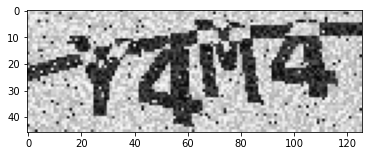

In [12]:
#check input_x data
showdata_seed=12

print ("input_x shape: "+str(origin_X.shape))
print ("origin_Y_onehot shape: "+str(origin_Y_onehot.shape))


'''    '''
position="~ 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 ~\n"
plt.imshow(origin_X[showdata_seed])
print ("origin_Y : "+str(origin_Y[showdata_seed]))
print ("origin_Y_onehot : \n"+position+str(origin_Y_onehot[showdata_seed]))



-------------------------------------------
---------------- index 0 ----------------


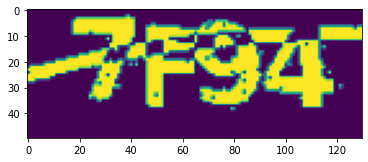

predict= [('7', 'F', '9', '4')]
answer= [('7', 'F', '9', '4')] ,wrong words= 0


-------------------------------------------
---------------- index 1 ----------------


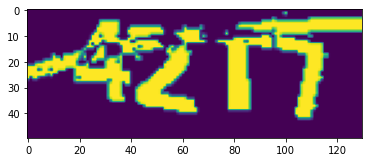

predict= [('4', '2', 'T', '7')]
answer= [('4', '2', 'T', '7')] ,wrong words= 0


-------------------------------------------
---------------- index 2 ----------------


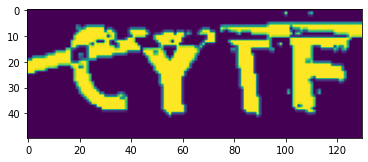

predict= [('C', 'Y', 'T', 'F')]
answer= [('C', 'Y', 'T', 'F')] ,wrong words= 0


-------------------------------------------
---------------- index 3 ----------------


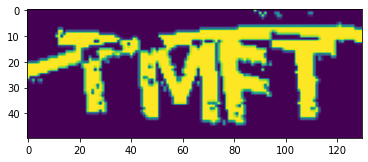

predict= [('T', 'M', 'F', 'T')]
answer= [('T', 'M', 'F', 'T')] ,wrong words= 0


-------------------------------------------
---------------- index 4 ----------------


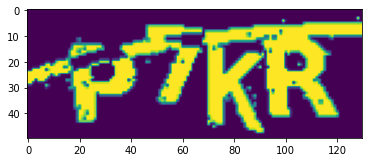

predict= [('P', '7', 'K', 'R')]
answer= [('P', '7', 'K', 'R')] ,wrong words= 0


-------------------------------------------
---------------- index 5 ----------------


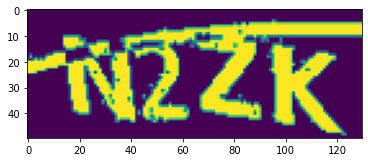

predict= [('N', '2', 'Z', 'K')]
answer= [('N', '2', 'Z', 'K')] ,wrong words= 0


-------------------------------------------
---------------- index 6 ----------------


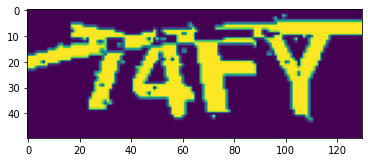

predict= [('7', '4', 'F', 'Y')]
answer= [('7', '4', 'F', 'Y')] ,wrong words= 0


-------------------------------------------
---------------- index 7 ----------------


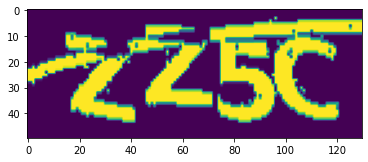

predict= [('Z', 'Z', '5', 'C')]
answer= [('Z', 'Z', '5', 'C')] ,wrong words= 0


-------------------------------------------
---------------- index 8 ----------------


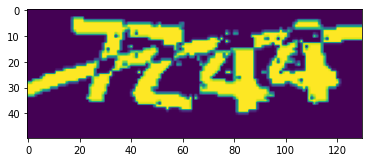

predict= [('7', 'Z', '4', '4')]
answer= [('7', 'Z', '4', '4')] ,wrong words= 0


-------------------------------------------
---------------- index 9 ----------------


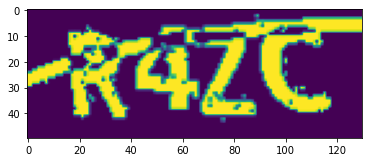

predict= [('R', '4', 'Z', 'C')]
answer= [('R', '4', 'Z', 'C')] ,wrong words= 0


-------------------------------------------
---------------- index 10 ----------------


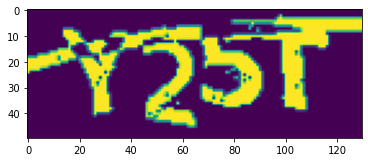

predict= [('Y', '2', '5', 'T')]
answer= [('Y', '2', '5', 'T')] ,wrong words= 0


-------------------------------------------
---------------- index 11 ----------------


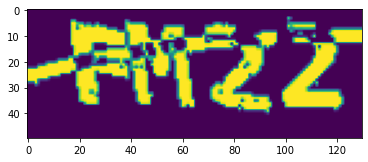

predict= [('F', 'M', '2', '2')]
answer= [('F', 'M', '2', '2')] ,wrong words= 0


-------------------------------------------
---------------- index 12 ----------------


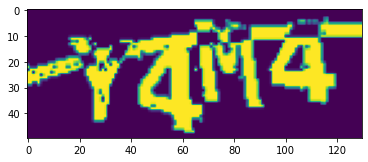

predict= [('Y', '4', 'M', '4')]
answer= [('Y', '4', 'M', '4')] ,wrong words= 0


-------------------------------------------
---------------- index 13 ----------------
predict= [('M', '2', '2', '2')]
answer= [('M', '2', 'Q', '2')] ,wrong words= 1


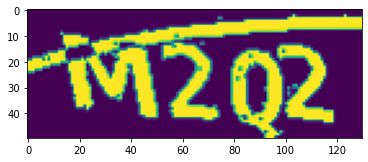

predict= [('M', '2', '2', '2')]
answer= [('M', '2', 'Q', '2')] ,wrong words= 1


-------------------------------------------
---------------- index 14 ----------------
predict= [('F', 'F', 'R', 'N')]
answer= [('F', 'F', '7', 'N')] ,wrong words= 1


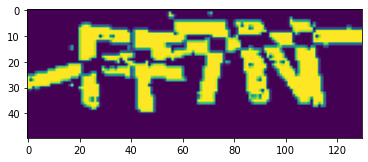

predict= [('F', 'F', 'R', 'N')]
answer= [('F', 'F', '7', 'N')] ,wrong words= 1


-------------------------------------------
---------------- index 15 ----------------


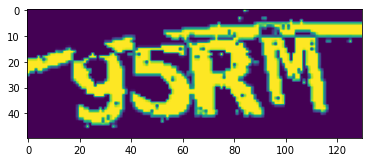

predict= [('9', '5', 'R', 'M')]
answer= [('9', '5', 'R', 'M')] ,wrong words= 0


-------------------------------------------
---------------- index 16 ----------------


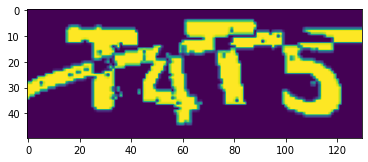

predict= [('T', '4', 'T', '5')]
answer= [('T', '4', 'T', '5')] ,wrong words= 0


-------------------------------------------
---------------- index 17 ----------------
predict= [('F', '3', '4', 'A')]
answer= [('F', '3', '4', '3')] ,wrong words= 1


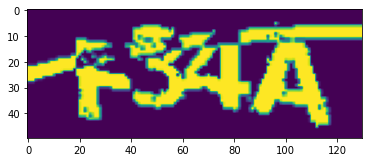

predict= [('F', '3', '4', 'A')]
answer= [('F', '3', '4', '3')] ,wrong words= 1


-------------------------------------------
---------------- index 18 ----------------


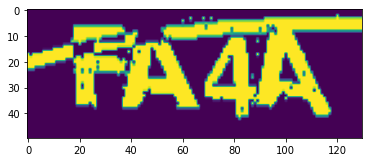

predict= [('F', 'A', '4', 'A')]
answer= [('F', 'A', '4', 'A')] ,wrong words= 0


-------------------------------------------
---------------- index 19 ----------------


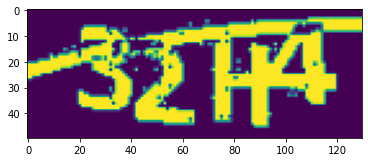

predict= [('3', '2', 'H', '4')]
answer= [('3', '2', 'H', '4')] ,wrong words= 0


-------------------------------------------
---------------- index 20 ----------------


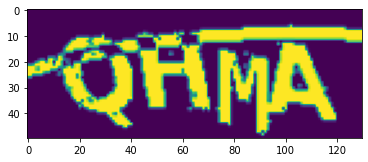

predict= [('Q', 'H', 'M', 'A')]
answer= [('Q', 'H', 'M', 'A')] ,wrong words= 0


-------------------------------------------
---------------- index 21 ----------------


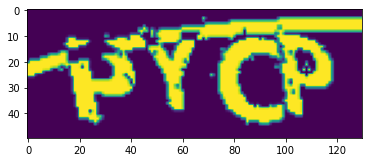

predict= [('P', 'Y', 'C', 'P')]
answer= [('P', 'Y', 'C', 'P')] ,wrong words= 0


-------------------------------------------
---------------- index 22 ----------------


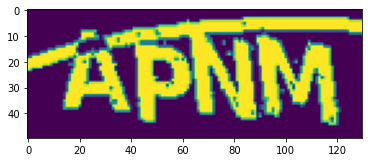

predict= [('A', 'P', 'N', 'M')]
answer= [('A', 'P', 'N', 'M')] ,wrong words= 0


-------------------------------------------
---------------- index 23 ----------------


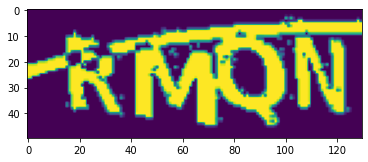

predict= [('R', 'M', 'Q', 'N')]
answer= [('R', 'M', 'Q', 'N')] ,wrong words= 0


-------------------------------------------
---------------- index 24 ----------------


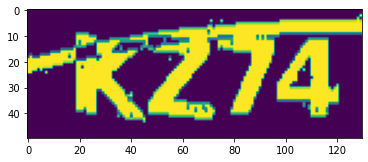

predict= [('K', 'Z', '7', '4')]
answer= [('K', 'Z', '7', '4')] ,wrong words= 0


-------------------------------------------
---------------- index 25 ----------------


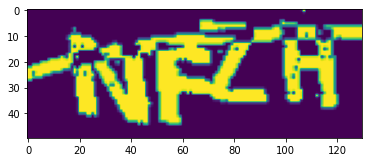

predict= [('N', 'F', 'Z', 'H')]
answer= [('N', 'F', 'Z', 'H')] ,wrong words= 0


-------------------------------------------
---------------- index 26 ----------------


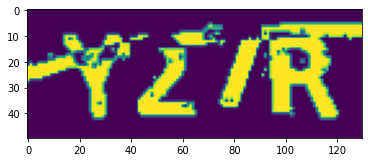

predict= [('Y', '2', '7', 'R')]
answer= [('Y', '2', '7', 'R')] ,wrong words= 0


-------------------------------------------
---------------- index 27 ----------------
predict= [('A', 'Y', 'R', 'K')]
answer= [('A', 'Y', 'R', '4')] ,wrong words= 1


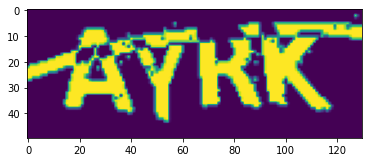

predict= [('A', 'Y', 'R', 'K')]
answer= [('A', 'Y', 'R', '4')] ,wrong words= 1


-------------------------------------------
---------------- index 28 ----------------


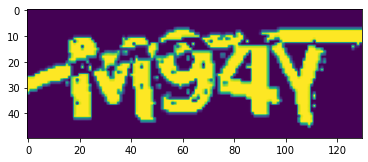

predict= [('M', '9', '4', 'Y')]
answer= [('M', '9', '4', 'Y')] ,wrong words= 0


-------------------------------------------
---------------- index 29 ----------------


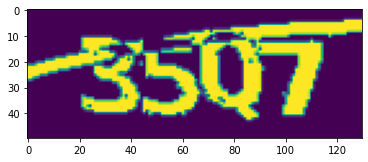

predict= [('3', '5', 'Q', '7')]
answer= [('3', '5', 'Q', '7')] ,wrong words= 0


-------------------------------------------
---------------- index 30 ----------------


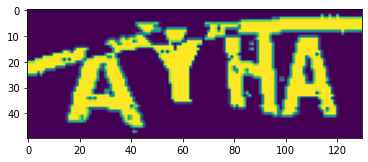

predict= [('A', 'Y', 'H', 'A')]
answer= [('A', 'Y', 'H', 'A')] ,wrong words= 0


-------------------------------------------
---------------- index 31 ----------------


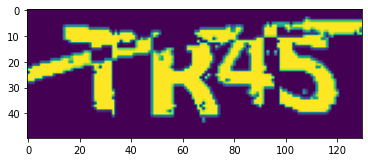

predict= [('T', 'R', '4', '5')]
answer= [('T', 'R', '4', '5')] ,wrong words= 0


-------------------------------------------
---------------- index 32 ----------------


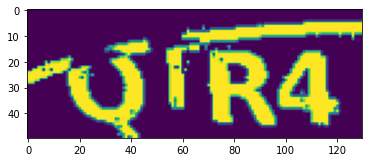

predict= [('Q', 'T', 'R', '4')]
answer= [('Q', 'T', 'R', '4')] ,wrong words= 0


-------------------------------------------
---------------- index 33 ----------------


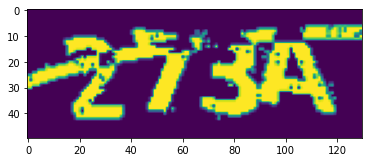

predict= [('2', '7', '3', 'A')]
answer= [('2', '7', '3', 'A')] ,wrong words= 0


-------------------------------------------
---------------- index 34 ----------------


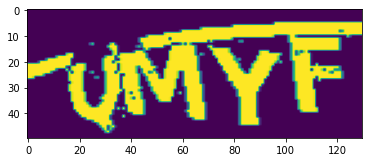

predict= [('Q', 'M', 'Y', 'F')]
answer= [('Q', 'M', 'Y', 'F')] ,wrong words= 0


-------------------------------------------
---------------- index 35 ----------------


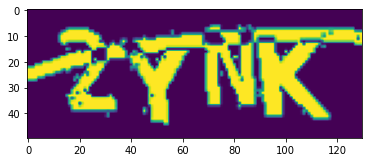

predict= [('2', 'Y', 'N', 'K')]
answer= [('2', 'Y', 'N', 'K')] ,wrong words= 0


-------------------------------------------
---------------- index 36 ----------------


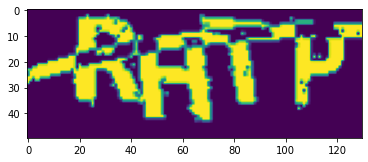

predict= [('R', 'H', 'T', 'P')]
answer= [('R', 'H', 'T', 'P')] ,wrong words= 0


-------------------------------------------
---------------- index 37 ----------------
predict= [('7', 'K', 'Q', 'M')]
answer= [('7', 'K', 'Q', '5')] ,wrong words= 1


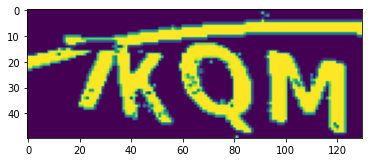

predict= [('7', 'K', 'Q', 'M')]
answer= [('7', 'K', 'Q', '5')] ,wrong words= 1


-------------------------------------------
---------------- index 38 ----------------


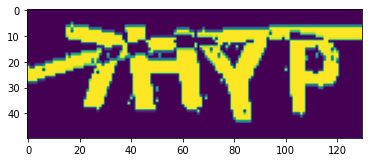

predict= [('7', 'H', 'Y', 'P')]
answer= [('7', 'H', 'Y', 'P')] ,wrong words= 0


-------------------------------------------
---------------- index 39 ----------------


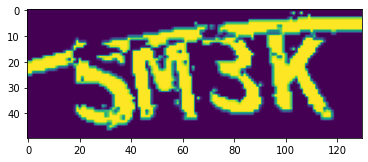

predict= [('5', 'M', '3', 'K')]
answer= [('5', 'M', '3', 'K')] ,wrong words= 0


-------------------------------------------
---------------- index 40 ----------------


-------------------------------------------
---------------- index 41 ----------------


-------------------------------------------
---------------- index 42 ----------------


-------------------------------------------
---------------- index 43 ----------------
predict= [('M', 'M', 'C', 'T')]
answer= [('M', 'M', 'C', 'Q')] ,wrong words= 1


-------------------------------------------
---------------- index 44 ----------------


-------------------------------------------
---------------- index 45 ----------------


-------------------------------------------
---------------- index 46 ----------------


-------------------------------------------
---------------- index 47 ----------------


-------------------------------------------
---------------- index 48 ----------------


---------------------------------------



-------------------------------------------
---------------- index 131 ----------------


-------------------------------------------
---------------- index 132 ----------------


-------------------------------------------
---------------- index 133 ----------------


-------------------------------------------
---------------- index 134 ----------------


-------------------------------------------
---------------- index 135 ----------------


-------------------------------------------
---------------- index 136 ----------------


-------------------------------------------
---------------- index 137 ----------------


-------------------------------------------
---------------- index 138 ----------------


-------------------------------------------
---------------- index 139 ----------------


-------------------------------------------
---------------- index 140 ----------------


-------------------------------------------
---------------- index 141 ----------------


--------



-------------------------------------------
---------------- index 218 ----------------


-------------------------------------------
---------------- index 219 ----------------


-------------------------------------------
---------------- index 220 ----------------


-------------------------------------------
---------------- index 221 ----------------


-------------------------------------------
---------------- index 222 ----------------


-------------------------------------------
---------------- index 223 ----------------


-------------------------------------------
---------------- index 224 ----------------


-------------------------------------------
---------------- index 225 ----------------


-------------------------------------------
---------------- index 226 ----------------


-------------------------------------------
---------------- index 227 ----------------


-------------------------------------------
---------------- index 228 ----------------


--------



-------------------------------------------
---------------- index 310 ----------------


-------------------------------------------
---------------- index 311 ----------------


-------------------------------------------
---------------- index 312 ----------------


-------------------------------------------
---------------- index 313 ----------------


-------------------------------------------
---------------- index 314 ----------------


-------------------------------------------
---------------- index 315 ----------------


-------------------------------------------
---------------- index 316 ----------------


-------------------------------------------
---------------- index 317 ----------------


-------------------------------------------
---------------- index 318 ----------------


-------------------------------------------
---------------- index 319 ----------------


-------------------------------------------
---------------- index 320 ----------------


--------



-------------------------------------------
---------------- index 398 ----------------


-------------------------------------------
---------------- index 399 ----------------
predict= [('N', 'Q', 'Q', 'N')]
answer= [('N', 'Q', 'C', 'N')] ,wrong words= 1


-------------------------------------------
---------------- index 400 ----------------


-------------------------------------------
---------------- index 401 ----------------


-------------------------------------------
---------------- index 402 ----------------


-------------------------------------------
---------------- index 403 ----------------


-------------------------------------------
---------------- index 404 ----------------


-------------------------------------------
---------------- index 405 ----------------


-------------------------------------------
---------------- index 406 ----------------


-------------------------------------------
---------------- index 407 ----------------


-------------------



-------------------------------------------
---------------- index 487 ----------------


-------------------------------------------
---------------- index 488 ----------------


-------------------------------------------
---------------- index 489 ----------------


-------------------------------------------
---------------- index 490 ----------------


-------------------------------------------
---------------- index 491 ----------------


-------------------------------------------
---------------- index 492 ----------------


-------------------------------------------
---------------- index 493 ----------------


-------------------------------------------
---------------- index 494 ----------------


-------------------------------------------
---------------- index 495 ----------------


-------------------------------------------
---------------- index 496 ----------------


-------------------------------------------
---------------- index 497 ----------------


--------



-------------------------------------------
---------------- index 578 ----------------


-------------------------------------------
---------------- index 579 ----------------


-------------------------------------------
---------------- index 580 ----------------


-------------------------------------------
---------------- index 581 ----------------


-------------------------------------------
---------------- index 582 ----------------


-------------------------------------------
---------------- index 583 ----------------


-------------------------------------------
---------------- index 584 ----------------


-------------------------------------------
---------------- index 585 ----------------


-------------------------------------------
---------------- index 586 ----------------


-------------------------------------------
---------------- index 587 ----------------


-------------------------------------------
---------------- index 588 ----------------


--------



-------------------------------------------
---------------- index 664 ----------------


-------------------------------------------
---------------- index 665 ----------------


-------------------------------------------
---------------- index 666 ----------------


-------------------------------------------
---------------- index 667 ----------------


-------------------------------------------
---------------- index 668 ----------------


-------------------------------------------
---------------- index 669 ----------------


-------------------------------------------
---------------- index 670 ----------------


-------------------------------------------
---------------- index 671 ----------------


-------------------------------------------
---------------- index 672 ----------------


-------------------------------------------
---------------- index 673 ----------------


-------------------------------------------
---------------- index 674 ----------------


--------



-------------------------------------------
---------------- index 750 ----------------


-------------------------------------------
---------------- index 751 ----------------


-------------------------------------------
---------------- index 752 ----------------


-------------------------------------------
---------------- index 753 ----------------
predict= [('P', '9', '3', 'F')]
answer= [('P', '9', '3', 'P')] ,wrong words= 1


-------------------------------------------
---------------- index 754 ----------------


-------------------------------------------
---------------- index 755 ----------------


-------------------------------------------
---------------- index 756 ----------------


-------------------------------------------
---------------- index 757 ----------------


-------------------------------------------
---------------- index 758 ----------------


-------------------------------------------
---------------- index 759 ----------------


-------------------



-------------------------------------------
---------------- index 837 ----------------


-------------------------------------------
---------------- index 838 ----------------


-------------------------------------------
---------------- index 839 ----------------


-------------------------------------------
---------------- index 840 ----------------


-------------------------------------------
---------------- index 841 ----------------


-------------------------------------------
---------------- index 842 ----------------


-------------------------------------------
---------------- index 843 ----------------


-------------------------------------------
---------------- index 844 ----------------
predict= [('T', 'K', 'Q', '2')]
answer= [('T', 'K', 'Q', '4')] ,wrong words= 1


-------------------------------------------
---------------- index 845 ----------------


-------------------------------------------
---------------- index 846 ----------------


-------------------

predict= [('Q', 'F', 'N', '4')]
answer= [('Q', 'T', 'N', '4')] ,wrong words= 1


-------------------------------------------
---------------- index 924 ----------------


-------------------------------------------
---------------- index 925 ----------------


-------------------------------------------
---------------- index 926 ----------------


-------------------------------------------
---------------- index 927 ----------------
predict= [('C', '3', 'N', '3')]
answer= [('C', '3', 'N', 'C')] ,wrong words= 1


-------------------------------------------
---------------- index 928 ----------------


-------------------------------------------
---------------- index 929 ----------------


-------------------------------------------
---------------- index 930 ----------------


-------------------------------------------
---------------- index 931 ----------------


-------------------------------------------
---------------- index 932 ----------------


------------------------------

---------------- index 1007 ----------------


-------------------------------------------
---------------- index 1008 ----------------


-------------------------------------------
---------------- index 1009 ----------------


-------------------------------------------
---------------- index 1010 ----------------


-------------------------------------------
---------------- index 1011 ----------------


-------------------------------------------
---------------- index 1012 ----------------


-------------------------------------------
---------------- index 1013 ----------------


-------------------------------------------
---------------- index 1014 ----------------


-------------------------------------------
---------------- index 1015 ----------------
predict= [('K', 'R', 'F', '2')]
answer= [('K', 'R', 'F', 'Z')] ,wrong words= 1


-------------------------------------------
---------------- index 1016 ----------------


-------------------------------------------
-----------

predict= [('P', '7', '3', 'F')]
answer= [('P', 'T', '3', 'F')] ,wrong words= 1


-------------------------------------------
---------------- index 1097 ----------------


-------------------------------------------
---------------- index 1098 ----------------


-------------------------------------------
---------------- index 1099 ----------------


-------------------------------------------
---------------- index 1100 ----------------


-------------------------------------------
---------------- index 1101 ----------------


-------------------------------------------
---------------- index 1102 ----------------


-------------------------------------------
---------------- index 1103 ----------------


-------------------------------------------
---------------- index 1104 ----------------


-------------------------------------------
---------------- index 1105 ----------------


-------------------------------------------
---------------- index 1106 ----------------


---------



-------------------------------------------
---------------- index 1187 ----------------


-------------------------------------------
---------------- index 1188 ----------------


-------------------------------------------
---------------- index 1189 ----------------


-------------------------------------------
---------------- index 1190 ----------------
predict= [('C', 'H', '2', 'Q')]
answer= [('C', 'H', 'Z', 'Q')] ,wrong words= 1


-------------------------------------------
---------------- index 1191 ----------------


-------------------------------------------
---------------- index 1192 ----------------


-------------------------------------------
---------------- index 1193 ----------------


-------------------------------------------
---------------- index 1194 ----------------


-------------------------------------------
---------------- index 1195 ----------------


-------------------------------------------
---------------- index 1196 ----------------


---------

predict= [('2', '9', 'T', 'Q')]
answer= [('Z', '9', 'T', 'Q')] ,wrong words= 1


-------------------------------------------
---------------- index 1275 ----------------


-------------------------------------------
---------------- index 1276 ----------------


-------------------------------------------
---------------- index 1277 ----------------


-------------------------------------------
---------------- index 1278 ----------------


-------------------------------------------
---------------- index 1279 ----------------


-------------------------------------------
---------------- index 1280 ----------------


-------------------------------------------
---------------- index 1281 ----------------


-------------------------------------------
---------------- index 1282 ----------------
predict= [('F', 'C', '7', 'R')]
answer= [('H', 'C', '7', 'R')] ,wrong words= 1


-------------------------------------------
---------------- index 1283 ----------------


---------------------

predict= [('2', 'R', 'M', '9')]
answer= [('Z', 'R', 'M', '9')] ,wrong words= 1


-------------------------------------------
---------------- index 1353 ----------------


-------------------------------------------
---------------- index 1354 ----------------
predict= [('N', '2', 'H', 'A')]
answer= [('N', 'Z', 'H', 'A')] ,wrong words= 1


-------------------------------------------
---------------- index 1355 ----------------


-------------------------------------------
---------------- index 1356 ----------------


-------------------------------------------
---------------- index 1357 ----------------


-------------------------------------------
---------------- index 1358 ----------------
predict= [('R', '2', 'P', '5')]
answer= [('R', 'Z', 'P', '5')] ,wrong words= 1


-------------------------------------------
---------------- index 1359 ----------------


-------------------------------------------
---------------- index 1360 ----------------


---------------------------------



-------------------------------------------
---------------- index 1437 ----------------


-------------------------------------------
---------------- index 1438 ----------------


-------------------------------------------
---------------- index 1439 ----------------


-------------------------------------------
---------------- index 1440 ----------------


-------------------------------------------
---------------- index 1441 ----------------
predict= [('C', 'A', 'T', 'H')]
answer= [('C', 'A', 'T', 'R')] ,wrong words= 1


-------------------------------------------
---------------- index 1442 ----------------


-------------------------------------------
---------------- index 1443 ----------------


-------------------------------------------
---------------- index 1444 ----------------


-------------------------------------------
---------------- index 1445 ----------------
predict= [('Y', '9', 'R', '9')]
answer= [('Y', '9', 'K', '9')] ,wrong words= 1


---------------------



-------------------------------------------
---------------- index 1518 ----------------


-------------------------------------------
---------------- index 1519 ----------------


-------------------------------------------
---------------- index 1520 ----------------


-------------------------------------------
---------------- index 1521 ----------------


-------------------------------------------
---------------- index 1522 ----------------


-------------------------------------------
---------------- index 1523 ----------------


-------------------------------------------
---------------- index 1524 ----------------


-------------------------------------------
---------------- index 1525 ----------------


-------------------------------------------
---------------- index 1526 ----------------
predict= [('4', 'Z', '2', 'A')]
answer= [('4', 'Z', 'A', '2')] ,wrong words= 2


-------------------------------------------
---------------- index 1527 ----------------
predict= [(

predict= [('T', 'K', '9', '7')]
answer= [('F', 'K', '9', '7')] ,wrong words= 1


-------------------------------------------
---------------- index 1604 ----------------
predict= [('2', 'P', 'F', 'T')]
answer= [('Z', 'P', 'F', 'T')] ,wrong words= 1


-------------------------------------------
---------------- index 1605 ----------------


-------------------------------------------
---------------- index 1606 ----------------


-------------------------------------------
---------------- index 1607 ----------------


-------------------------------------------
---------------- index 1608 ----------------


-------------------------------------------
---------------- index 1609 ----------------


-------------------------------------------
---------------- index 1610 ----------------


-------------------------------------------
---------------- index 1611 ----------------


-------------------------------------------
---------------- index 1612 ----------------


---------------------



-------------------------------------------
---------------- index 1691 ----------------


-------------------------------------------
---------------- index 1692 ----------------
predict= [('2', 'P', 'C', 'M')]
answer= [('4', 'P', 'C', 'M')] ,wrong words= 1


-------------------------------------------
---------------- index 1693 ----------------


-------------------------------------------
---------------- index 1694 ----------------


-------------------------------------------
---------------- index 1695 ----------------


-------------------------------------------
---------------- index 1696 ----------------


-------------------------------------------
---------------- index 1697 ----------------


-------------------------------------------
---------------- index 1698 ----------------


-------------------------------------------
---------------- index 1699 ----------------


-------------------------------------------
---------------- index 1700 ----------------


---------



-------------------------------------------
---------------- index 1776 ----------------


-------------------------------------------
---------------- index 1777 ----------------


-------------------------------------------
---------------- index 1778 ----------------


-------------------------------------------
---------------- index 1779 ----------------


-------------------------------------------
---------------- index 1780 ----------------


-------------------------------------------
---------------- index 1781 ----------------


-------------------------------------------
---------------- index 1782 ----------------
predict= [('3', 'N', '9', 'M')]
answer= [('3', 'H', '9', 'M')] ,wrong words= 1


-------------------------------------------
---------------- index 1783 ----------------


-------------------------------------------
---------------- index 1784 ----------------


-------------------------------------------
---------------- index 1785 ----------------


---------



-------------------------------------------
---------------- index 1860 ----------------


-------------------------------------------
---------------- index 1861 ----------------


-------------------------------------------
---------------- index 1862 ----------------


-------------------------------------------
---------------- index 1863 ----------------


-------------------------------------------
---------------- index 1864 ----------------


-------------------------------------------
---------------- index 1865 ----------------


-------------------------------------------
---------------- index 1866 ----------------
predict= [('2', 'C', 'T', 'K')]
answer= [('Z', 'C', 'T', 'K')] ,wrong words= 1


-------------------------------------------
---------------- index 1867 ----------------


-------------------------------------------
---------------- index 1868 ----------------


-------------------------------------------
---------------- index 1869 ----------------


---------

predict= [('H', 'A', 'M', 'M')]
answer= [('H', '4', 'M', 'M')] ,wrong words= 1


-------------------------------------------
---------------- index 1944 ----------------


-------------------------------------------
---------------- index 1945 ----------------


-------------------------------------------
---------------- index 1946 ----------------


-------------------------------------------
---------------- index 1947 ----------------


-------------------------------------------
---------------- index 1948 ----------------


-------------------------------------------
---------------- index 1949 ----------------


-------------------------------------------
---------------- index 1950 ----------------


-------------------------------------------
---------------- index 1951 ----------------


-------------------------------------------
---------------- index 1952 ----------------


-------------------------------------------
---------------- index 1953 ----------------
predict= [(



-------------------------------------------
---------------- index 2028 ----------------


-------------------------------------------
---------------- index 2029 ----------------


-------------------------------------------
---------------- index 2030 ----------------


-------------------------------------------
---------------- index 2031 ----------------


-------------------------------------------
---------------- index 2032 ----------------
predict= [('P', 'Q', 'K', 'A')]
answer= [('P', 'Q', 'K', 'P')] ,wrong words= 1


-------------------------------------------
---------------- index 2033 ----------------


-------------------------------------------
---------------- index 2034 ----------------


-------------------------------------------
---------------- index 2035 ----------------


-------------------------------------------
---------------- index 2036 ----------------


-------------------------------------------
---------------- index 2037 ----------------


---------



-------------------------------------------
---------------- index 2116 ----------------
predict= [('R', '5', '7', '2')]
answer= [('R', '5', '7', 'Z')] ,wrong words= 1


-------------------------------------------
---------------- index 2117 ----------------


-------------------------------------------
---------------- index 2118 ----------------


-------------------------------------------
---------------- index 2119 ----------------
predict= [('3', 'P', '9', '9')]
answer= [('9', 'P', '9', '9')] ,wrong words= 1


-------------------------------------------
---------------- index 2120 ----------------


-------------------------------------------
---------------- index 2121 ----------------


-------------------------------------------
---------------- index 2122 ----------------


-------------------------------------------
---------------- index 2123 ----------------


-------------------------------------------
---------------- index 2124 ----------------


---------------------



-------------------------------------------
---------------- index 2201 ----------------


-------------------------------------------
---------------- index 2202 ----------------


-------------------------------------------
---------------- index 2203 ----------------


-------------------------------------------
---------------- index 2204 ----------------


-------------------------------------------
---------------- index 2205 ----------------


-------------------------------------------
---------------- index 2206 ----------------


-------------------------------------------
---------------- index 2207 ----------------


-------------------------------------------
---------------- index 2208 ----------------


-------------------------------------------
---------------- index 2209 ----------------


-------------------------------------------
---------------- index 2210 ----------------


-------------------------------------------
---------------- index 2211 ----------------



-------------------------------------------
---------------- index 2286 ----------------


-------------------------------------------
---------------- index 2287 ----------------


-------------------------------------------
---------------- index 2288 ----------------


-------------------------------------------
---------------- index 2289 ----------------


-------------------------------------------
---------------- index 2290 ----------------
predict= [('M', 'R', 'F', '9')]
answer= [('M', 'R', 'P', '9')] ,wrong words= 1


-------------------------------------------
---------------- index 2291 ----------------


-------------------------------------------
---------------- index 2292 ----------------


-------------------------------------------
---------------- index 2293 ----------------


-------------------------------------------
---------------- index 2294 ----------------


-------------------------------------------
---------------- index 2295 ----------------


---------



-------------------------------------------
---------------- index 2372 ----------------


-------------------------------------------
---------------- index 2373 ----------------


-------------------------------------------
---------------- index 2374 ----------------


-------------------------------------------
---------------- index 2375 ----------------


-------------------------------------------
---------------- index 2376 ----------------


-------------------------------------------
---------------- index 2377 ----------------


-------------------------------------------
---------------- index 2378 ----------------


-------------------------------------------
---------------- index 2379 ----------------
predict= [('C', 'H', 'F', 'M')]
answer= [('C', 'H', 'T', 'M')] ,wrong words= 1


-------------------------------------------
---------------- index 2380 ----------------


-------------------------------------------
---------------- index 2381 ----------------


---------



-------------------------------------------
---------------- index 2457 ----------------


-------------------------------------------
---------------- index 2458 ----------------
predict= [('A', 'M', '3', '4')]
answer= [('A', '3', '3', '4')] ,wrong words= 1


-------------------------------------------
---------------- index 2459 ----------------


-------------------------------------------
---------------- index 2460 ----------------


-------------------------------------------
---------------- index 2461 ----------------


-------------------------------------------
---------------- index 2462 ----------------


-------------------------------------------
---------------- index 2463 ----------------


-------------------------------------------
---------------- index 2464 ----------------


-------------------------------------------
---------------- index 2465 ----------------


-------------------------------------------
---------------- index 2466 ----------------


---------

predict= [('C', '3', 'A', '4')]
answer= [('C', '3', '4', 'A')] ,wrong words= 2


-------------------------------------------
---------------- index 2541 ----------------
predict= [('3', '9', '3', 'F')]
answer= [('9', '9', '3', 'F')] ,wrong words= 1


-------------------------------------------
---------------- index 2542 ----------------


-------------------------------------------
---------------- index 2543 ----------------


-------------------------------------------
---------------- index 2544 ----------------


-------------------------------------------
---------------- index 2545 ----------------


-------------------------------------------
---------------- index 2546 ----------------


-------------------------------------------
---------------- index 2547 ----------------


-------------------------------------------
---------------- index 2548 ----------------


-------------------------------------------
---------------- index 2549 ----------------


---------------------



-------------------------------------------
---------------- index 2627 ----------------


-------------------------------------------
---------------- index 2628 ----------------


-------------------------------------------
---------------- index 2629 ----------------


-------------------------------------------
---------------- index 2630 ----------------


-------------------------------------------
---------------- index 2631 ----------------


-------------------------------------------
---------------- index 2632 ----------------


-------------------------------------------
---------------- index 2633 ----------------


-------------------------------------------
---------------- index 2634 ----------------


-------------------------------------------
---------------- index 2635 ----------------


-------------------------------------------
---------------- index 2636 ----------------
predict= [('P', '5', 'P', 'P')]
answer= [('M', '5', 'P', 'P')] ,wrong words= 1


---------



-------------------------------------------
---------------- index 2713 ----------------


-------------------------------------------
---------------- index 2714 ----------------


-------------------------------------------
---------------- index 2715 ----------------


-------------------------------------------
---------------- index 2716 ----------------


-------------------------------------------
---------------- index 2717 ----------------


-------------------------------------------
---------------- index 2718 ----------------


-------------------------------------------
---------------- index 2719 ----------------


-------------------------------------------
---------------- index 2720 ----------------


-------------------------------------------
---------------- index 2721 ----------------


-------------------------------------------
---------------- index 2722 ----------------


-------------------------------------------
---------------- index 2723 ----------------



-------------------------------------------
---------------- index 2798 ----------------


-------------------------------------------
---------------- index 2799 ----------------


-------------------------------------------
---------------- index 2800 ----------------


-------------------------------------------
---------------- index 2801 ----------------


-------------------------------------------
---------------- index 2802 ----------------


-------------------------------------------
---------------- index 2803 ----------------


-------------------------------------------
---------------- index 2804 ----------------


-------------------------------------------
---------------- index 2805 ----------------


-------------------------------------------
---------------- index 2806 ----------------


-------------------------------------------
---------------- index 2807 ----------------


-------------------------------------------
---------------- index 2808 ----------------



-------------------------------------------
---------------- index 2883 ----------------


-------------------------------------------
---------------- index 2884 ----------------
predict= [('5', 'C', '3', '4')]
answer= [('F', 'C', '3', '4')] ,wrong words= 1


-------------------------------------------
---------------- index 2885 ----------------


-------------------------------------------
---------------- index 2886 ----------------


-------------------------------------------
---------------- index 2887 ----------------


-------------------------------------------
---------------- index 2888 ----------------


-------------------------------------------
---------------- index 2889 ----------------


-------------------------------------------
---------------- index 2890 ----------------


-------------------------------------------
---------------- index 2891 ----------------


-------------------------------------------
---------------- index 2892 ----------------


---------



-------------------------------------------
---------------- index 2969 ----------------


-------------------------------------------
---------------- index 2970 ----------------


-------------------------------------------
---------------- index 2971 ----------------


-------------------------------------------
---------------- index 2972 ----------------


-------------------------------------------
---------------- index 2973 ----------------


-------------------------------------------
---------------- index 2974 ----------------


-------------------------------------------
---------------- index 2975 ----------------


-------------------------------------------
---------------- index 2976 ----------------


-------------------------------------------
---------------- index 2977 ----------------


-------------------------------------------
---------------- index 2978 ----------------


-------------------------------------------
---------------- index 2979 ----------------

In [13]:
#predict
index=0
error=0
error_n=0
accumulate_time=0

start_total=time.time()

for i in origin_X:
    # 初始化
    print ('\n\n-------------------------------------------')
    print ('---------------- index',index,'----------------')
    predict_out=[]
    answer_out=[]
    temp=0
    start = time.time()
    # 依據使用的模型決定是否要預處理 
    # EX: model_name ='dn1_test_2021_10_19 01_47_20.h5'
    #     model_name.split('_')[0] == 'dn1'
    
    if model_name.split('_')[0] == 'nopre': 
        img = Image.fromarray(i) # array要轉為image才能resize
        img=img.resize((130,50))
    elif model_name.split('_')[0] == 'dn1':
        i=predo.img_denoise(i)
        img = Image.fromarray(i) # array要轉為image才能resize
        img=img.resize((130,50))
    elif model_name.split('_')[0] == 'dn2':
        i=predo.img_denoise2(i)
        img = Image.fromarray(i) # array要轉為image才能resize
        img=img.resize((130,50))
        
    h=np.array(img)
    #print (h.shape)
    h=h.reshape(1,50,130,-1) # 轉為 (1,50,130,3) or (1,50,130,1)
    
    prediction=test.predict(h.astype('float32')/255) # predict
    
    # 轉譯偵測結果
    N1=translate_Y(one_hot_decode(prediction[0])[0]) # one_hot_decode 將19可能依信心排序
    N2=translate_Y(one_hot_decode(prediction[1])[0]) # translate_Y 由數字 1~19轉為符號
    N3=translate_Y(one_hot_decode(prediction[2])[0])
    N4=translate_Y(one_hot_decode(prediction[3])[0])   
    
    
    
    predict_out.append((N1,N2,N3,N4)) #四字元合併
    
    end = time.time()
    accumulate_time += (end - start)
    
    # 轉譯 Ground Truth    
    a1=translate_Y(origin_Y[index][0])
    a2=translate_Y(origin_Y[index][1])
    a3=translate_Y(origin_Y[index][2])
    a4=translate_Y(origin_Y[index][3])
    
    answer_out.append((a1,a2,a3,a4))
    
    
    if N1!=a1:
        error_n+=1 #此模型錯幾個字元
        temp+=1    #此圖錯幾個字元
    if N2!=a2:
        error_n+=1
        temp+=1
    if N3!=a3:
        error_n+=1
        temp+=1
    if N4!=a4:
        error_n+=1
        temp+=1
    
    if (N1!=a1 or N2!=a2 or N3!=a3 or N4!=a4):
        '''
        img = Image.fromarray(i, 'RGB')
        plt.imshow(img)
        plt.show()
        '''
        error+=1  
        print("predict=",predict_out)
        print("answer=",answer_out,",wrong words=",temp)
        
    if index<40:
        plt.imshow(img)
        plt.show()
        print("predict=",predict_out)
        print("answer=",answer_out,",wrong words=",temp)
        
    index+=1
    '''
    #快速看demo結果用，可將此段註解#
    if (index==250): 
        break
    ###########################
    '''

In [14]:
#result   
num_picture=index
acc= (num_picture-error)/num_picture
acc_n=(num_picture*4-error_n)/(num_picture*4)

print (num_picture,"picture total wrong =",error)
print ("image accuracy = ",acc)
print ("word accuracy = ",acc_n)

print ('average per execute time: %f ms' %(accumulate_time/len(origin_X)*1000))

acc_total=0
end_total=time.time()
acc_total+=end_total-start_total
print ("total execute time = %f s " %(acc_total))


3000 picture total wrong = 234
image accuracy =  0.922
word accuracy =  0.9784166666666667
average per execute time: 84.030596 ms
total execute time = 339.646858 s 
